### Configuration du notebook et importation des modules

In [1]:
import os
os.chdir('../')
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/MachineLearning/projet'

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

### Importation des données

In [3]:
data = pd.read_csv('data/cac40_v3.csv').drop('Unnamed: 0', axis=1)
data

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation
0,AC,2007,10,1,50.8200,52.4500,50.7200,52.4400,939518,0.0456,...,0,0,0,0,0,0,0,0,0,0
1,AC,2007,10,10,57.6000,57.9000,56.4800,56.7400,1167710,0.0056,...,0,0,0,0,0,0,0,0,0,0
2,AC,2007,10,11,56.5700,57.9000,56.5700,57.0600,910369,-0.0053,...,0,0,0,0,0,0,0,0,0,0
3,AC,2007,10,12,57.1000,57.1000,55.5000,56.7600,996349,-0.0116,...,0,0,0,0,0,0,0,0,0,0
4,AC,2007,10,15,56.7600,57.2900,55.7700,56.1000,573647,-0.0032,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106537,VIV,2017,9,4,20.0650,20.2350,20.0300,20.1000,2250835,0.0027,...,0,0,0,0,0,0,0,0,0,0
106538,VIV,2017,9,5,20.0950,20.2900,19.9850,20.1550,3095238,-0.0020,...,0,0,0,0,0,0,0,0,0,0
106539,VIV,2017,9,6,20.0800,20.2100,20.0150,20.1150,2181925,-0.0065,...,0,0,0,0,0,0,0,0,0,0
106540,VIV,2017,9,7,20.1850,20.1850,19.9200,19.9850,4038684,-0.0023,...,0,0,0,0,0,0,0,0,0,0


# Exploration des données
***

### Question 1)

Donner les charactéristiques de la base :
- Nombre de lignes
- Nombre de colonnes
- Format / Type de colonnes

In [4]:
print(f"Nombre de lignes : {data.shape[0]}")
print(f"Nombre de colonees : {data.shape[1]}")

Nombre de lignes : 106542
Nombre de colonees : 280


In [5]:
col_types = {}
for series_name, series in data.iteritems():
    col_types[series_name] = series.dtype
col_types = pd.DataFrame(col_types.values(),index=col_types.keys())
col_types.rename(axis='columns', mapper={0:'Type'}, inplace=True)

In [6]:
col_types

,Type
TICKER,object
annee,int64
mois,int64
jour,int64
OP,float64
...,...
collaboration,int64
developpement,int64
l_acquisition,int64
participation,int64


### Question 2)

Présenter quelques statistiques de la base

<b>2. a. Variables quantitatives</b>

In [7]:
def numerical_description(variables:list, data:pd.DataFrame) -> pd.DataFrame:
    numeric_describe = data[variables].describe()
    numeric_describe.loc["count"] = numeric_describe.loc["count"].astype('int64')
    min_max = numeric_describe.loc["max"] - numeric_describe.loc["min"]
    min_max.name = "Max min diff"
    numeric_describe = numeric_describe.append(min_max)
    return numeric_describe

> _2. a. i. Variables dépendentes_

In [8]:
variables_num_dep = ["RDMT_J", "RDMT_S", "RDMT_M"]
numeric_describe = numerical_description(variables_num_dep, data)

In [9]:
numeric_describe

,RDMT_J,RDMT_S,RDMT_M
count,"106,542.0000","106,542.0000","106,542.0000"
mean,0.0003,0.0015,0.0060
std,0.0219,0.0478,0.0959
min,-0.2624,-0.3753,-0.6000
25%,-0.0102,-0.0228,-0.0451
50%,0.0002,0.0018,0.0070
75%,0.0106,0.0256,0.0583
max,0.2632,0.5205,1.1347
Max min diff,0.5256,0.8958,1.7347


> _2. a. ii. Variables explicatives candidates_

In [10]:
variables_num_explic = ["OP", "UP", "DO", "CL", "VO"] + [f"{var}_{x}" for x in ["J", "S", "M"] for var in ["HISTO", "VOL", "UP", "DO"]]
numeric_describe = numerical_description(variables_num_explic, data)

In [11]:
numeric_describe

,OP,UP,DO,CL,VO,HISTO_J,VOL_J,UP_J,DO_J,HISTO_S,VOL_S,UP_S,DO_S,HISTO_M,VOL_M,UP_M,DO_M
count,"106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000"
mean,52.7514,53.3303,52.1291,52.7383,"2,697,386.7025",0.0003,"147,641.4109",0.0003,0.0003,0.0014,"250,007.6708",0.0013,0.0015,0.0056,"182,393.0719",0.0053,0.0057
std,41.9334,42.2790,41.5656,41.9329,"3,253,352.8790",0.0219,"48,191,262.0662",0.0193,0.0206,0.0478,"81,604,381.0431",0.0452,0.0481,0.0938,"59,534,437.3877",0.0912,0.0953
min,2.2400,2.2740,2.1200,2.1960,0.0000,-0.2624,-1.0000,-0.2956,-0.2753,-0.3753,-1.0000,-0.3442,-0.3882,-0.6084,-1.0000,-0.5790,-0.6045
25%,23.7000,24.0350,23.3150,23.6950,"693,341.2500",-0.0102,-0.2256,-0.0085,-0.0090,-0.0229,-0.2666,-0.0221,-0.0226,-0.0443,-0.3034,-0.0437,-0.0443
50%,42.0950,42.6000,41.5275,42.0650,"1,549,323.0000",0.0002,-0.0082,0.0000,0.0008,0.0017,-0.0061,0.0014,0.0021,0.0063,-0.0117,0.0061,0.0072
75%,67.2734,67.9900,66.5500,67.2500,"3,488,776.5000",0.0106,0.2789,0.0087,0.0098,0.0255,0.3542,0.0242,0.0258,0.0567,0.4169,0.0551,0.0576
max,394.9500,397.0000,391.0500,395.3500,"63,825,207.0000",0.2632,"15,729,999,999.0000",0.2880,0.2693,0.5205,"26,636,299,999.0000",0.4516,0.6227,1.0593,"19,432,499,999.0000",1.0490,1.0743
Max min diff,392.7100,394.7260,388.9300,393.1540,"63,825,207.0000",0.5256,"15,730,000,000.0000",0.5836,0.5445,0.8958,"26,636,300,000.0000",0.7958,1.0110,1.6678,"19,432,500,000.0000",1.6281,1.6789


> _2. a. iii. Corrélation dans les variables numériques_

In [12]:
numeric_variables = variables_num_dep + variables_num_explic
corr = data[numeric_variables].corr()

In [28]:
def __plot_correlation_matrix_plt(corr: pd.DataFrame, title:str):
    fig = plt.figure(figsize=(8,8))
    plt.matshow(corr, fignum = fig.number)
    plt.xticks(range(len(numeric_variables)), numeric_variables, rotation=45)
    plt.yticks(range(len(numeric_variables)), numeric_variables)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title(title, fontsize=16, pad=30);

def __plot_correlation_matrix_sns(corr: pd.DataFrame, title:str):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
    plt.title(title, pad=30);

def plot_correlation_matrix(corr: pd.DataFrame, title:str, which:str):
    if which=='pyplot':
        return __plot_correlation_matrix_plt(corr, title)
    elif which=='seaborn':
        return __plot_correlation_matrix_sns(corr, title)
    else:
        raise ValueError("Plotting method not implemented. Choose 'pyplot' or 'seaborn'")

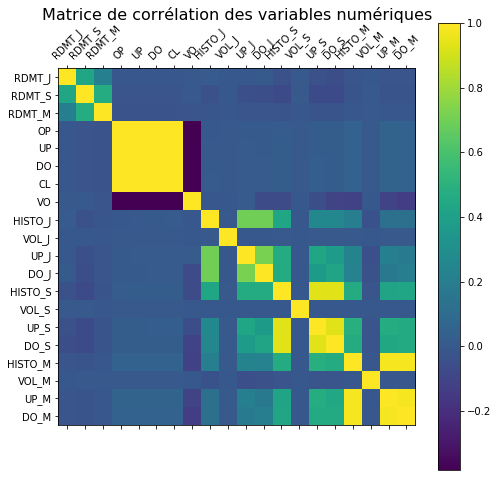

In [29]:
plot_correlation_matrix(corr, "Matrice de corrélation des variables numériques", 'pyplot')

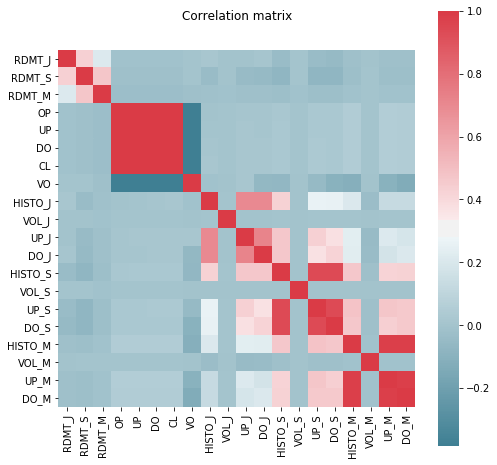

In [26]:
plot_correlation_matrix(corr, "Correlation matrix", 'seaborn')

<b>2. b. Variables catégoriques</b>

In [15]:
non_numeric_variables = data.columns[~data.columns.isin(numeric_variables)]
words = non_numeric_variables[4:]
descriptive_variables = non_numeric_variables[:4]

> _2. b. i. Variables descriptives_

> _2. b. ii. Variables mots_

In [30]:
data.iloc[:,200:-1]

,confirme,contrats,corridor,creation,decroche,emission,finalise,franchit,generale,l_achat.,...,retracement,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Filtration des données
***

### Question 3)

Montrer que, _quelque soit le ticker_, la liste des mots apparaissant sur 400 lignes et dont le rendement mensuel est en moyenne supérieur à 1% est telle que la table dans le sujet.  

In [16]:
# On veut l'effet du mot, indépendamment de ticker
freq_word_ret = {}
for word in words:
    if data[word].sum() > 400:
        mean_return = np.mean(data["RDMT_M"].loc[data[word] == 1])
        num_app = data[word].sum()
        if mean_return > 0.01:
            freq_word_ret[word] = (num_app, mean_return)

In [17]:
df = pd.DataFrame(freq_word_ret).transpose().rename(axis='columns', mapper={0:"Nombre d'apparitions", 1:"Rendement mensuel moyen"})
df["Nombre d'apparitions"] = df["Nombre d'apparitions"].astype('int64')
df.index.name = "Mot"
df

,Nombre d'apparitions,Rendement mensuel moyen
Mot,,
part,716,0.0119
plus,418,0.0101
pour,1966,0.0136
euros,446,0.0104
group,493,0.0129
passe,527,0.0138
titre,467,0.0122
groupe,467,0.0146
nouvel,494,0.0115


<b>Filtrer la base sur l'apparition de ces mots</b>

In [ ]:
keepers = list(freq_word_ret.keys())
data["KEEP_ROW"] = data[keepers].sum(axis=1)
data = data.loc[~(data["KEEP_ROW"] == 0)].drop("KEEP_ROW", axis=1).reset_index(drop=True)

In [ ]:
data

### Question 4)

Retrait des variables trop corrélées (positivement ou négativement).

In [ ]:
correlation_matrix = data.loc[:,~data.columns.isin(["TICKER", "annee", "mois", "jour"])].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
high_corr_vars = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.75)]

In [ ]:
high_corr_vars

In [ ]:
data.drop(high_corr_vars, axis=1, inplace=True)

In [ ]:
data